In [0]:
import pandas as pd
import json
from pandas.io.json import json_normalize  
from google.colab import drive
import datetime
drive.mount('/content/gdrive/',force_remount = True)
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/merged.csv")

Mounted at /content/gdrive/


In [0]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,date_A,airport_A,date_D,airport_D,FlightDate,Origin,Dest,A_date
0,0,0,0,2,0,2,0,1
1,0,0,0,3,0,3,0,1
2,0,0,0,4,0,4,0,1
3,0,0,0,14,0,14,0,1
4,0,0,0,2,0,2,0,1
5,0,0,0,2,0,2,0,1
6,0,0,0,2,0,2,0,0
7,0,0,0,7,0,7,0,1
8,0,0,0,8,0,8,0,1
9,0,0,0,8,0,8,0,1


In [0]:
df = df[df.ArrDel15 != 0.0]

In [0]:
print("total rows      :    ",df.count()["ArrDelayMinutes"])

print("count<=100      :    " ,df[df["ArrDelayMinutes"]<=100].count()["ArrDelayMinutes"])
print("100<count<=500  :    " ,df[(df["ArrDelayMinutes"]>100) & (df["ArrDelayMinutes"]<=500)].count()["ArrDelayMinutes"])
print("500<count<=1000 :    " ,df[(df["ArrDelayMinutes"]>500) & (df["ArrDelayMinutes"]<=1000)].count()["ArrDelayMinutes"])
print("1000<count      :    " ,df[df["ArrDelayMinutes"]>1000].count()["ArrDelayMinutes"])

total rows      :     370611
count<=100      :     309896
100<count<=500  :     59498
500<count<=1000 :     1048
1000<count      :     169


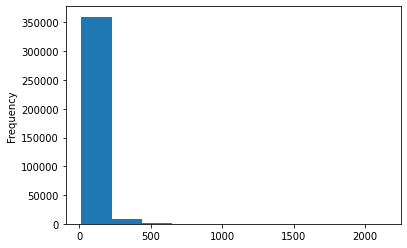

In [0]:
df["ArrDelayMinutes"].plot(kind = 'hist')  

In [0]:
cut_labels_4 = ['lessthan100', '100to500', '500to1000', 'morethan1000']
cut_bins = [0, 100, 200, 500, 3000]
df['delay_class'] = pd.cut(df["ArrDelayMinutes"], bins=cut_bins, labels=cut_labels_4)
df.head()

df.plot("delay_class",kind = 'bar')  

In [0]:
from sklearn.utils import shuffle
df = shuffle(df)
df = df_train.drop(['Unnamed: 0','ArrDel15','ArrTime','CRSArrTime','round_Atime','round_Dtime', 'DepTime','A_date','DepDel15','date_A','date_D'],axis=1)
df.head()

,Unnamed: 0,windspeedKmph_A,DewPointC_A,cloudcover_A,precipMM_A,pressure_A,WindGustKmph_A,visibility_A,tempC_A,WindChillC_A,winddirDegree_A,humidity_A,date_A,airport_A,itime_A,windspeedKmph_D,DewPointC_D,cloudcover_D,precipMM_D,pressure_D,WindGustKmph_D,visibility_D,tempC_D,WindChillC_D,winddirDegree_D,humidity_D,date_D,airport_D,itime_D,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,round_Dtime,round_Atime,A_date
560354,1967839,12,23,7,0.0,1019,14,10,31,31,183,67,598,4,2000.0,12,15,47,0.0,1015,14,10,23,20,250,73,598,14,1200.0,2017,3,8,21,598,14,4,1140,1257.0,77.0,1.0,2013,2141.0,88.0,1.0,1200,2000,598
673424,2294559,22,5,17,0.0,1019,41,10,8,6,192,87,90,6,600.0,8,12,44,0.0,1016,9,10,14,14,211,90,90,8,2100.0,2016,1,3,31,90,8,6,2120,2200.0,40.0,1.0,552,607.0,15.0,1.0,2100,600,91
665585,2276836,19,-6,100,0.7,1023,25,8,-3,-8,12,81,21,6,2300.0,21,13,100,1.0,1015,29,10,15,13,188,92,21,14,1500.0,2016,1,1,22,21,14,6,1500,1459.0,0.0,0.0,2323,2343.0,20.0,1.0,1500,2300,21
536918,1912939,31,16,100,0.0,999,45,10,20,20,210,79,425,4,1800.0,6,6,46,0.0,1030,10,6,9,7,132,89,425,14,1000.0,2017,1,3,1,425,14,4,950,1113.0,83.0,1.0,1800,1921.0,81.0,1.0,1000,1800,425
169436,815897,12,20,0,0.0,1019,14,10,33,32,56,50,240,1,1600.0,8,14,0,0.0,1015,9,10,30,27,114,43,240,12,900.0,2016,3,8,28,240,12,1,835,944.0,69.0,1.0,1540,1642.0,62.0,1.0,900,1600,240


In [0]:
df_train = df[:250000]
df_test  = df[250000:]
df_test1 = df[df["ArrDelayMinutes"] <= 100]
df_test2 = df[(df["ArrDelayMinutes"]>100) & (df["ArrDelayMinutes"]<=500)]
df_test3 = df[(df["ArrDelayMinutes"]>500) & (df["ArrDelayMinutes"]<=1000)]
df_test4 = df[df["ArrDelayMinutes"]>1000]

y_train = np.array(df_train['ArrDelayMinutes'])
df_train = df_train.drop(['ArrDelayMinutes'],axis=1)
X_train = np.array(df_train)

y_test1 = np.array(df_test1['ArrDelayMinutes'])
df_test1 = df_test1.drop(['ArrDelayMinutes'],axis=1)
X_test1 = np.array(df_test1)

y_test2 = np.array(df_test2['ArrDelayMinutes'])
df_test2 = df_test2.drop(['ArrDelayMinutes'],axis=1)
X_test2 = np.array(df_test2)

y_test3 = np.array(df_test3['ArrDelayMinutes'])
df_test3 = df_test3.drop(['ArrDelayMinutes'],axis=1)
X_test3 = np.array(df_test3)

y_test4 = np.array(df_test4['ArrDelayMinutes'])
df_test4 = df_test4.drop(['ArrDelayMinutes'],axis=1)
X_test4 = np.array(df_test4)

In [0]:
from sklearn.ensemble import ExtraTreesRegressor

clf = ExtraTreesRegressor(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)



ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

In [0]:
from sklearn import metrics
y_pred = clf.predict(X_test1)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

Mean Absolute Error: 2.567801617316777
Mean Squared Error: 38.32338215046338
Root Mean Squared Error: 6.190588190993113


In [0]:
y_pred = clf.predict(X_test2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))

Mean Absolute Error: 5.103021109953276
Mean Squared Error: 177.03818285152443
Root Mean Squared Error: 13.305569617702371


In [0]:
y_pred = clf.predict(X_test3)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test3, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test3, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred)))

Mean Absolute Error: 4.891106870229006
Mean Squared Error: 187.91235477099232
Root Mean Squared Error: 13.708112735566203


In [0]:
y_pred = clf.predict(X_test4)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test4, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test4, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test4, y_pred)))

Mean Absolute Error: 8.415562130177513
Mean Squared Error: 942.2254207100586
Root Mean Squared Error: 30.69569058858358
